<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

##### Binary classfication ( yes / no - 0  / 1 )          

##### Categorical classfication

In this tutorial we will see how to use logistic regression for multiclass classification. 

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
import warnings
#warnings.filterwarnings("ignore")

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
import pandas as pd
df = pd.DataFrame(digits.data)
df["target"] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [19]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [20]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [7]:
len(digits.images)

1797

In [6]:
digits.target[100]

4

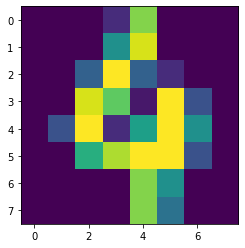

In [8]:
plt.imshow(digits.images[100])

<Figure size 432x288 with 0 Axes>

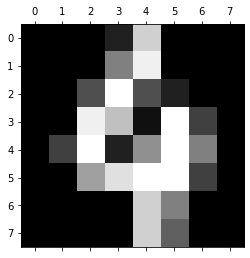

In [9]:
plt.gray()
plt.matshow(digits.images[100])

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
len(digits.images)

1797

In [12]:
len(digits.data)

1797

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

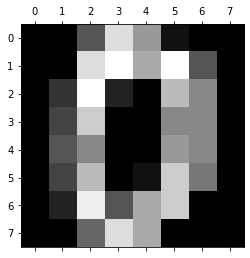

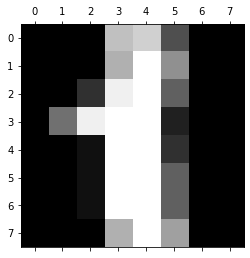

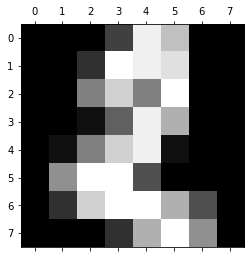

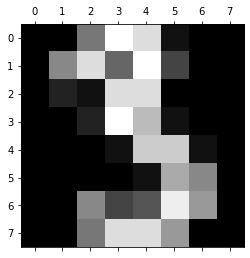

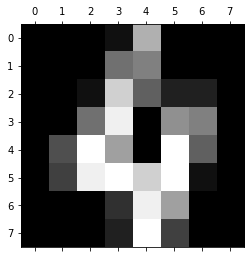

In [14]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [14]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

0

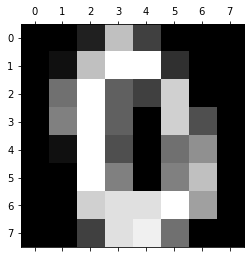

In [30]:
plt.matshow(digits.images[150])
digits.target[150] # real value 

In [19]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [34]:
len(digits.target)

1797

In [10]:
type(digits.data)

numpy.ndarray

In [15]:
x = digits.data #pixel values of images
y = digits.target

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [26]:
from sklearn.model_selection import train_test_split

In [18]:
for i in digits.target:
    print(i)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
7
9
5
4
8
8
4
9
0
8
9
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
5
4
8
8
4
9
0
8
9
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
7
9
5
4
8
8
4
9
0
8
9
3
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [28]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [29]:
model.score(X_train, y_train) # no overfitting

1.0

In [30]:
model.score(X_test, y_test)

0.9805555555555555

In [20]:
for i in range(5):
    print(digits.target[i])

0
1
2
3
4


In [24]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [25]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [26]:
len(X_train)

1437

In [27]:
len(X_test)

360

In [32]:
y_predicted = model.predict(X_test)

In [33]:
y_predicted

array([3, 5, 9, 8, 9, 6, 9, 6, 6, 5, 6, 6, 9, 7, 9, 1, 5, 8, 6, 0, 9, 5,
       6, 0, 2, 6, 0, 6, 5, 9, 9, 6, 1, 7, 5, 6, 6, 0, 9, 4, 8, 1, 1, 9,
       9, 8, 1, 9, 4, 3, 5, 4, 0, 6, 4, 3, 1, 5, 0, 5, 6, 8, 9, 7, 5, 4,
       1, 7, 3, 5, 7, 2, 4, 0, 0, 4, 7, 6, 9, 1, 7, 4, 1, 7, 9, 5, 5, 3,
       4, 4, 3, 7, 9, 2, 6, 5, 5, 0, 2, 6, 2, 4, 9, 0, 9, 6, 8, 3, 6, 4,
       6, 9, 7, 7, 7, 6, 7, 8, 8, 7, 1, 4, 7, 5, 3, 0, 9, 0, 0, 5, 0, 0,
       2, 5, 6, 7, 2, 6, 6, 6, 2, 0, 2, 4, 1, 1, 8, 7, 2, 0, 6, 0, 0, 3,
       8, 1, 9, 3, 0, 2, 4, 6, 3, 3, 5, 1, 2, 8, 0, 6, 2, 0, 5, 8, 6, 7,
       5, 5, 2, 5, 1, 4, 9, 8, 2, 3, 6, 0, 9, 0, 9, 8, 6, 1, 1, 0, 6, 8,
       5, 9, 9, 7, 5, 9, 6, 3, 1, 7, 8, 4, 5, 3, 6, 8, 4, 1, 2, 7, 9, 5,
       9, 4, 9, 8, 1, 6, 7, 5, 5, 5, 7, 6, 3, 1, 1, 5, 1, 5, 1, 3, 3, 7,
       4, 2, 6, 1, 5, 2, 1, 9, 0, 3, 0, 2, 4, 2, 2, 4, 8, 6, 1, 8, 4, 4,
       0, 6, 2, 8, 9, 7, 4, 4, 3, 8, 1, 7, 2, 0, 2, 5, 9, 7, 9, 8, 8, 3,
       3, 5, 9, 3, 0, 7, 3, 6, 0, 4, 4, 2, 1, 5, 5,

In [34]:
len(y_predicted)

360

In [35]:
y_test[1]

5

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted) # compare between predicted values, actual values 
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 29,  1],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

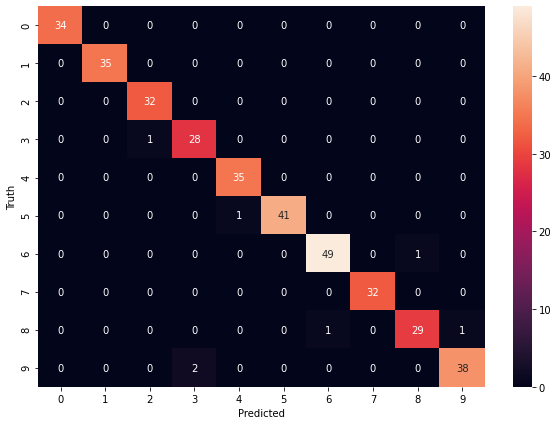

In [37]:
#%matplotlib notebook
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise**

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img height=300 width=300 src="iris_petal_sepal.png" />

In [35]:
from sklearn.datasets import load_iris

In [36]:
data = load_iris()

In [37]:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [40]:
import pandas as pd
df = pd.DataFrame(data.data , columns= data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [46]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
model.score(X_test, y_test)

0.9666666666666667